# **Methodology To Be Adopted**
## How to gather the data and build the approach to come up with the solution

Now that the consultant has been identified to come up with a solution, let us check what approach he can choose -

Steps in building the required Data -

**1. Have a detailed list of Postal Codes for California State along with the Latitude and Longitude details for each and every postal code**

There are multiple web sites on internet where you can get the Postal Codes for California State along with Latitude and Longitude Details
Once the website is identified, the details can be extracted in one of the two ways --
1. Scrape the data from the website using html5 library and load the same in pandas
2. Get the details downloaded in a CSV format. Make necessary changes in the data and then upload the same in the pandas

In case we want to scrape the data using html5 library, following command needs to be executed to install the package -
**pip install html5lib**

Once that is done - we will need lxml package to scrape the contents of the webpage - **pip install lxml**

Next Step -
Import Pandas - **import pandas as pd**

Using following syntax to get the details in pandas -
dfs = pd.read_html('URL', header = 0)

Now, we have a data in place that will consist at least following columns - 

1. Postal Code
2. Borough
3. City
4. State
5. Latitude
6. Longitude

There can be few changes made like - removing the State column considering for all the columns it will be the same - **'California'**

**2. Considering there are multiple cities in the California State, shortlisting only Los Angeles for narrowing down the research part. Assumption is that compared to other Cities, Los Angeles is a better pick.**

This can be replicating the Dataframe to a new one with only the details where City is **'Los Angeles'**

**3. Now that we have all the Latitudes and Longitudes details for all the postal codes, next thing that we need is the neighborhood details for all these postal codes**

Neighborhood details actually mean Venues surrounding the Postal Code

We can get the details from Foursquare location data

Getting the Credentials First

CLIENT_ID = 'Foursquare ID'
CLIENT_SECRET = 'Foursquare Secret'
VERSION = 'Version Number'

Generating URL with which requests can be made to Foursquare APIs for fetching Venues data

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, limit)
url

**4. Using the Foursquare Location data for getting the details about the nearby Venues**

We already have the Credentials in place and also the URL created. 
Now we can request Foursquare API for the venues details.

For that, 1st step is to import requests library using following command - **import requests**

Once the request is made, the result that we can from Foursquare will be a JSON file.
To be able to read it properly and do required operations on it, we will need to get the details from JSON transferred to Pandas Dataframe.

For this we will need JSON Normalization package by executing following command - **from pandas.io.json import json_normalize**

Making the request be using following code - **results = requests.get(url).json()**

**5. What to expect from Neighborhood Data and Why do we need that ?**

Which Neighborhoods should be more appealing for an Ice Cream Parlor ?

When we want our Ice Cream Parlor to be in an easy reach to the customers, first level of filtering the venues that we have will be to identify areas with a good population density. 

How to figure out whether the Density is low or high – 
This we can figure out based on the existing venues in the localities – The places where there are many restaurants, shopping malls, schools, colleges, universities, firms, corporate/business parks. 

In general, this is all about finding areas that are always filled with potential customers rather than choosing the areas which are too residential and lacks the human activity needed to sustain the business.

**Important venues to be tracked from the Foursquare Location Data -**

1. Restaurants/Pubs
2. Malls
3. Multiplexes, Cinema Theatres, Local Operas
4. Schools
5. Universities/Colleges
6. Industries/Firms/Business Parks
7. Airports/Bus Terminals/Metro Stations

Apart from these, once we have the venue details, we can add few more to the list.

**6. Finding Top Venues for all the Postal Codes to check the areas of our interest, the areas that will suit an Ice Cream Parlor**

This will be done by Finding 10 common venues in order for all the postal codes that we have. This will be done using One Hot Coding - Having a counter set for all the venues and counting the number of such venues for each of the neighbourhood. 
Once that is done, sorting it in a descending order and coming up with the Top 10 Venues for each Borough/Postal Code.

Here, it is now important, to check the venues that are not of interest and removing those from the list.

Now we will have a reduced list of Boroughs having the venues or localities that have interest for us.

**7. Using the Top Venues Data, cluster will be formed of different areas based on similarity of venues and then it will be presented to the Client - IceStorm**

Clusters can be formed using the similarity of the top venues for each of the Borough. Clustering can be done using K-Means.

This now can be mapped on a graph using the geopy plotting function

**8. Once we have details on the venues of the clusters, we can the prioritize the details based on the list of neighborhood in point no. 4 and come up with 2-3 Postal Codes where IceStorm can start its Ice Cream Parlor.**

We can then present the shortlisted clusters to the Client and then see if any further narrowing is needed and if we can get more specifications to narrow down the result.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('LA.csv')

In [3]:
df.head(5)

,Sr. no,Borough,PinCode,Neighborhood,Latitude,Longitude
0,1,Beverly Hills,90210,Beverly Hills,34.090,-118.41
1,2,Los Angeles,90002,"Southeast Los Angeles, Watts",33.950,-118.25
2,3,Los Angeles,90004,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.30
3,4,Los Angeles,90012,"Downtown Civic Center, Chinatown, Arts Distric...",34.061,-118.24
4,5,Los Angeles,90017,"Downtown Bunker Hill, City West, South Park-North",34.056,-118.27


## Setting up the Foursquare Credentials

In [8]:
CLIENT_ID = 'FFC1QZGY50XQSEEWBX4EP1AWTB1XNSYKZ2GJBWPYAA2NRMQ1' # your Foursquare ID
CLIENT_SECRET = 'KBOHF4AMJMFPKULTCZUU4VWXGFHKEQHQA3F3ELHGDWCEFJA3' # your Foursquare Secret
VERSION = '20200425'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FFC1QZGY50XQSEEWBX4EP1AWTB1XNSYKZ2GJBWPYAA2NRMQ1
CLIENT_SECRET:KBOHF4AMJMFPKULTCZUU4VWXGFHKEQHQA3F3ELHGDWCEFJA3


In [9]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

In [10]:
from geopy.geocoders import Nominatim

In [11]:
address = 'Los Angeles, California'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles city are 34.0536909, -118.2427666.


In [12]:
radius = 500
limit = 100
VERSION = 20200424
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=FFC1QZGY50XQSEEWBX4EP1AWTB1XNSYKZ2GJBWPYAA2NRMQ1&client_secret=KBOHF4AMJMFPKULTCZUU4VWXGFHKEQHQA3F3ELHGDWCEFJA3&v=20200424&ll=34.0536909,-118.2427666&radius=500&limit=100'

In [13]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea50164bae9a2001bdb2bf9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Civic Center',
  'headerFullLocation': 'Civic Center, Los Angeles',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 34.0581909045, 'lng': -118.23734531946405},
   'sw': {'lat': 34.0491908955, 'lng': -118.24818788053594}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fecf601067d351381ea64fa',
       'name': 'Grand Park',
       'location': {'address': '200 N Grand Ave',
        'crossStreet': 'btwn Temple & 1st St',
        'lat': 34.05503441823839,
        'lng': -118.24517873806079,
        'labeledLatLngs': [

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Grand Park,Park,34.055034,-118.245179
1,Badmaash,Indian Restaurant,34.051342,-118.244571
2,Redbird,American Restaurant,34.050666,-118.244068
3,Kinokuniya Bookstore,Bookstore,34.050145,-118.242246
4,JiST Cafe,Breakfast Spot,34.050908,-118.240436


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

24 venues were returned by Foursquare.


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT
            )
        
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [19]:
LA_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Beverly Hills
Southeast Los Angeles, Watts
Hancock Park, Rampart Village, Virgil Village, Wilshire Center, Windsor Square
Downtown Civic Center, Chinatown, Arts District, Bunker Hill, Historic Core, Little Tokyo
Downtown Bunker Hill, City West, South Park-North
Jefferson Park, Leimert Park
Hancock Park, Western Wilton, Wilshire Center, Windsor Square
Westwood
Sawtelle, West Los Angeles
Griffith Park, Hollywood, Los Feliz
Lincoln Heights, Montecito Heights
West Fairfax
Fairfax, Melrose, Miracle Mile, Park La Brea, Wilshire-La Brea
Hollywood
Atwater Village, Elysian Valley, Silver Lake
Eagle Rock
Los Angeles International Airport, Westchester
Mid-City West, West Hollywood
Bel Air Estates, Brentwood
Westlake
Cheviot Hills, Rancho Park
Century City
Downtown Bunker Hill, City West, Historic Core, South Park-North
Beverly Hills
Culver City
Redondo Beach, Torrance
Marina Peninsula, Marina del Rey
Downtown
Santa Monica
Santa Monica
Ocean Park, Santa Monica Airport, Sunpark
Torrance
Long Beach


In [20]:
print(LA_venues.shape)
LA_venues.head()

(1764, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beverly Hills,34.09,-118.41,Coldwater Canyon Park,34.091264,-118.411829,Park
1,Beverly Hills,34.09,-118.41,Coldwater Canyon Park Soft Track,34.089688,-118.412130,Trail
2,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.3,Guatemalteca Bakery,34.076303,-118.297168,Restaurant
3,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.3,Noshi Sushi,34.076159,-118.305374,Sushi Restaurant
4,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.3,Atlacatl Restaurant,34.076503,-118.294707,Latin American Restaurant


In [21]:
LA_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beverly Hills,34.09,-118.41,Coldwater Canyon Park,34.091264,-118.411829,Park
1,Beverly Hills,34.09,-118.41,Coldwater Canyon Park Soft Track,34.089688,-118.412130,Trail
2,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.3,Guatemalteca Bakery,34.076303,-118.297168,Restaurant
3,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.3,Noshi Sushi,34.076159,-118.305374,Sushi Restaurant
4,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.3,Atlacatl Restaurant,34.076503,-118.294707,Latin American Restaurant
...,...,...,...,...,...,...,...
1759,PO Boxes,34.019,-118.49,Home simply yoga,34.015860,-118.490241,Yoga Studio
1760,PO Boxes,34.019,-118.49,New Beauty At Fred Segal,34.015939,-118.492107,Department Store
1761,PO Boxes,34.019,-118.49,Juice Studios,34.017319,-118.485632,Recording Studio
1762,PO Boxes,34.019,-118.49,Juice,34.017318,-118.485592,Juice Bar


In [22]:
print('There are {} uniques categories.'.format(len(LA_venues['Venue Category'].unique())))

There are 249 uniques categories.


In [23]:
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")


LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 


fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Yoga Studio,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
LA_onehot.shape

(1764, 249)

In [25]:
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Arlington Heights, Country Club Park, Mid-City",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Baldwin Hills, Crenshaw, Leimert Park",0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000
2,"Bel Air Estates, Beverly Glen",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Bel Air Estates, Brentwood",0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.043478,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Beverly Hills,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
5,Boyle Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Castellemare, Pacific Highlands, Pacific Palis...",0.000000,0.021739,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Century City,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Cheviot Hills, Rancho Park",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Commerce, East Los Angeles",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
LA_grouped.shape

(57, 249)

In [27]:
num_top_venues = 5

for hood in LA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arlington Heights, Country Club Park, Mid-City----
                 venue  freq
0   Mexican Restaurant  0.13
1         Intersection  0.09
2  Fried Chicken Joint  0.09
3    Korean Restaurant  0.09
4   Chinese Restaurant  0.09


----Baldwin Hills, Crenshaw, Leimert Park----
                  venue  freq
0      Department Store  0.06
1    Mexican Restaurant  0.06
2        Lingerie Store  0.06
3  Fast Food Restaurant  0.06
4        Sandwich Place  0.06


----Bel Air Estates, Beverly Glen----
                venue  freq
0  Photography Studio  0.33
1    Business Service  0.33
2      Scenic Lookout  0.33
3         Yoga Studio  0.00
4        Noodle House  0.00


----Bel Air Estates, Brentwood----
                venue  freq
0  Italian Restaurant  0.17
1              Bakery  0.09
2           Juice Bar  0.04
3                Bank  0.04
4       Deli / Bodega  0.04


----Beverly Hills----
           venue  freq
0    Coffee Shop  0.12
1  Women's Store  0.08
2          Hotel  0.08
3     Restaura

In [118]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LA_grouped['Neighborhood']

for ind in np.arange(LA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Arlington Heights, Country Club Park, Mid-City",Mexican Restaurant,Korean Restaurant,Intersection,Fried Chicken Joint,Chinese Restaurant,Bus Station,Food Truck,Ice Cream Shop,Taco Place,Latin American Restaurant
1,"Baldwin Hills, Crenshaw, Leimert Park",Mexican Restaurant,Fast Food Restaurant,Department Store,Lingerie Store,Sandwich Place,Southern / Soul Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,Shoe Store,Seafood Restaurant
2,"Bel Air Estates, Beverly Glen",Photography Studio,Business Service,Scenic Lookout,Women's Store,Electronics Store,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
3,"Bel Air Estates, Brentwood",Italian Restaurant,Bakery,Pet Store,Coffee Shop,Café,Sandwich Place,Fast Food Restaurant,Restaurant,Dog Run,Nail Salon
4,Beverly Hills,Coffee Shop,Women's Store,Hotel,Pizza Place,Restaurant,Steakhouse,Juice Bar,Cosmetics Shop,Cocktail Bar,Café


In [57]:

from sklearn.cluster import KMeans

# set number of clusters
kclusters = 6

LA_grouped_clustering = LA_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([1, 1, 5, 5, 5, 1, 5, 4, 1, 1, 1, 0, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5,
       5, 5, 1, 5, 1, 1, 5, 5, 1, 1, 5, 1, 5, 0, 5, 5, 5, 5, 3, 5, 5, 5,
       5, 5, 1, 1, 2, 1, 1, 5, 5, 5, 5, 5, 5], dtype=int32)

In [60]:
LA_grouped_clustering.to_csv('Again.csv')
LA_grouped.to_csv('Verify.csv')
LA_grouped_new = pd.read_csv('Verify.csv')

In [65]:
LA_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
LA_merged = LA_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

LA_merged.head() # check the last columns!



In [67]:
##Somehow the cluster lables are not getting mapped to the data. Hence, Manually adding the labels.

LA_merged_new = pd.read_csv('Edit.csv')
LA_merged_new

,Sr. no,Borough,PinCode,Neighborhood,Cluster Label,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Beverly Hills,90210,Beverly Hills,5,34.090,-118.41,Coffee Shop,Women's Store,Hotel,Pizza Place,Restaurant,Steakhouse,Juice Bar,Cosmetics Shop,Cocktail Bar,Café
1,2,Los Angeles,90002,"Southeast Los Angeles, Watts",0,33.950,-118.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Los Angeles,90004,"Hancock Park, Rampart Village, Virgil Village,...",1,34.076,-118.30,Mexican Restaurant,Food Truck,Convenience Store,Pizza Place,Bakery,Thai Restaurant,Sandwich Place,Liquor Store,Restaurant,Latin American Restaurant
3,4,Los Angeles,90012,"Downtown Civic Center, Chinatown, Arts Distric...",1,34.061,-118.24,Chinese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Sandwich Place,Historic Site,Bakery,Coffee Shop,Tea Room,Seafood Restaurant,Plaza
4,5,Los Angeles,90017,"Downtown Bunker Hill, City West, South Park-North",1,34.056,-118.27,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Hotel,Steakhouse,Pharmacy,Pizza Place,Coffee Shop,Chinese Restaurant,Rental Car Location
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,Venice,90291,Venice,5,33.994,-118.46,Clothing Store,Yoga Studio,Sandwich Place,Furniture / Home Store,Convenience Store,Arts & Crafts Store,Boutique,Park,Men's Store,Resort
68,69,Playa Del Rey,90293,Playa del Rey,5,33.958,-118.44,Coffee Shop,Pizza Place,Gym / Fitness Center,Park,Flower Shop,Mediterranean Restaurant,Shipping Store,Sandwich Place,Massage Studio,Liquor Store
69,70,Venice,90294,Venice PO Boxes,5,33.991,-118.46,Men's Store,Café,Cosmetics Shop,Boutique,Restaurant,Clothing Store,New American Restaurant,Coffee Shop,Shoe Store,Market
70,71,Inglewood,90306,PO Boxes,5,33.962,-118.35,Coffee Shop,Fast Food Restaurant,Burger Joint,Italian Restaurant,Pizza Place,Bank,Salon / Barbershop,Chinese Restaurant,Mexican Restaurant,Hotel


In [117]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LA_merged_new['Latitude'], LA_merged_new['Longitude'], LA_merged_new['Neighborhood'], LA_merged_new['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [80]:
LA_merged_new.loc[LA_merged_new['Cluster Label'] == 1, LA_merged_new.columns[[3] + list(range(5, LA_merged_new.shape[1]))]]

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.30,Mexican Restaurant,Food Truck,Convenience Store,Pizza Place,Bakery,Thai Restaurant,Sandwich Place,Liquor Store,Restaurant,Latin American Restaurant
3,"Downtown Civic Center, Chinatown, Arts Distric...",34.061,-118.24,Chinese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Sandwich Place,Historic Site,Bakery,Coffee Shop,Tea Room,Seafood Restaurant,Plaza
4,"Downtown Bunker Hill, City West, South Park-North",34.056,-118.27,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Hotel,Steakhouse,Pharmacy,Pizza Place,Coffee Shop,Chinese Restaurant,Rental Car Location
5,"Jefferson Park, Leimert Park",34.029,-118.32,Park,Mexican Restaurant,Fried Chicken Joint,Carpet Store,Sandwich Place,Burger Joint,Skate Park,Convenience Store,High School,Food
10,"Lincoln Heights, Montecito Heights",34.078,-118.21,Convenience Store,Grocery Store,Fast Food Restaurant,Seafood Restaurant,Mexican Restaurant,Taco Place,Pizza Place,Historic Site,Food & Drink Shop,Flower Shop
20,"Cheviot Hills, Rancho Park",34.035,-118.43,Hotel,Sports Bar,Pizza Place,Pedestrian Plaza,Comic Shop,Discount Store,Chinese Restaurant,Fast Food Restaurant,Miscellaneous Shop,Mexican Restaurant
24,Culver City,33.995,-118.40,Pet Store,Convenience Store,Park,Fast Food Restaurant,Sandwich Place,Sports Bar,Karaoke Bar,Grocery Store,Middle Eastern Restaurant,Video Store
31,Torrance,33.840,-118.35,Mexican Restaurant,Chinese Restaurant,Pizza Place,Japanese Restaurant,Convenience Store,Mediterranean Restaurant,Shipping Store,Café,Mongolian Restaurant,Grocery Store
33,"South Los Angeles, Florence-Graham",33.973,-118.25,Mexican Restaurant,Pizza Place,Shoe Store,Bank,Grocery Store,Sandwich Place,Fast Food Restaurant,Pharmacy,Donut Shop,Flea Market
35,"Baldwin Hills, Crenshaw, Leimert Park",34.012,-118.34,Mexican Restaurant,Fast Food Restaurant,Department Store,Lingerie Store,Sandwich Place,Southern / Soul Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,Shoe Store,Seafood Restaurant


In [89]:
LA_merged_new.loc[LA_merged_new['Cluster Label'] == 5, LA_merged_new.columns[[1,3] + list(range(5, LA_merged_new.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beverly Hills,Beverly Hills,34.090,-118.41,Coffee Shop,Women's Store,Hotel,Pizza Place,Restaurant,Steakhouse,Juice Bar,Cosmetics Shop,Cocktail Bar,Café
6,Los Angeles,"Hancock Park, Western Wilton, Wilshire Center,...",34.067,-118.30,Korean Restaurant,Asian Restaurant,Coffee Shop,Restaurant,Café,Spa,Bubble Tea Shop,Burger Joint,Shabu-Shabu Restaurant,Seafood Restaurant
7,Los Angeles,Westwood,34.064,-118.44,Hotel,Coffee Shop,Supermarket,Big Box Store,Sandwich Place,Café,Residential Building (Apartment / Condo),Chinese Restaurant,Pool,Clothing Store
8,Los Angeles,"Sawtelle, West Los Angeles",34.045,-118.45,Sushi Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Gym,Mexican Restaurant,Indie Movie Theater,Café,Ramen Restaurant,Recording Studio,Pizza Place
9,Los Angeles,"Griffith Park, Hollywood, Los Feliz",34.104,-118.29,Italian Restaurant,Coffee Shop,Juice Bar,Thai Restaurant,Mediterranean Restaurant,Breakfast Spot,Diner,Gift Shop,Bookstore,Dive Bar
11,Los Angeles,West Fairfax,34.053,-118.38,Middle Eastern Restaurant,Pharmacy,Kosher Restaurant,French Restaurant,Grocery Store,Arcade,Sandwich Place,Asian Restaurant,Bakery,Flower Shop
12,Los Angeles,"Fairfax, Melrose, Miracle Mile, Park La Brea, ...",34.070,-118.35,Donut Shop,Convenience Store,Boxing Gym,Gym,Video Store,Coffee Shop,Residential Building (Apartment / Condo),Chinese Restaurant,Athletics & Sports,Fast Food Restaurant
13,Los Angeles,Hollywood,34.090,-118.32,Pizza Place,Lounge,Nightclub,Coffee Shop,Café,Asian Restaurant,Pharmacy,Hotel,Bar,Comedy Club
15,Los Angeles,Eagle Rock,34.134,-118.21,Music Venue,Vegetarian / Vegan Restaurant,American Restaurant,Flea Market,Event Space,Fabric Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Women's Store
17,Los Angeles,"Mid-City West, West Hollywood",34.074,-118.37,Café,Mexican Restaurant,Juice Bar,Salon / Barbershop,Pet Store,Cosmetics Shop,Seafood Restaurant,Italian Restaurant,French Restaurant,Chinese Restaurant


In [82]:
LA_merged_new.loc[LA_merged_new['Cluster Label'] == 2, LA_merged_new.columns[[3] + list(range(5, LA_merged_new.shape[1]))]]

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,"Southeast Los Angeles, Vernon",33.999,-118.21,Furniture / Home Store,Sandwich Place,Women's Store,Electronics Store,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Filipino Restaurant


In [83]:
LA_merged_new.loc[LA_merged_new['Cluster Label'] == 3, LA_merged_new.columns[[3] + list(range(5, LA_merged_new.shape[1]))]]

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,Pepperdine University,34.005,-118.81,Beach,Scenic Lookout,Art Gallery,State / Provincial Park,Women's Store,Fabric Shop,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market


In [84]:
LA_merged_new.loc[LA_merged_new['Cluster Label'] == 4, LA_merged_new.columns[[3] + list(range(5, LA_merged_new.shape[1]))]]

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Century City,34.055,-118.41,Food Truck,Park,Coffee Shop,Café,Spa,Cafeteria,Hotel,Performing Arts Venue,General Entertainment,Restaurant


In [113]:
Shortlist = LA_merged_new.loc[LA_merged_new['Cluster Label'] == 1, LA_merged_new.columns[[1,2,3] + list(range(5, LA_merged_new.shape[1]))]]

In [114]:
Shortlist

,Borough,PinCode,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Los Angeles,90004,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.30,Mexican Restaurant,Food Truck,Convenience Store,Pizza Place,Bakery,Thai Restaurant,Sandwich Place,Liquor Store,Restaurant,Latin American Restaurant
3,Los Angeles,90012,"Downtown Civic Center, Chinatown, Arts Distric...",34.061,-118.24,Chinese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Sandwich Place,Historic Site,Bakery,Coffee Shop,Tea Room,Seafood Restaurant,Plaza
4,Los Angeles,90017,"Downtown Bunker Hill, City West, South Park-North",34.056,-118.27,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Hotel,Steakhouse,Pharmacy,Pizza Place,Coffee Shop,Chinese Restaurant,Rental Car Location
5,Los Angeles,90018,"Jefferson Park, Leimert Park",34.029,-118.32,Park,Mexican Restaurant,Fried Chicken Joint,Carpet Store,Sandwich Place,Burger Joint,Skate Park,Convenience Store,High School,Food
10,Los Angeles,90031,"Lincoln Heights, Montecito Heights",34.078,-118.21,Convenience Store,Grocery Store,Fast Food Restaurant,Seafood Restaurant,Mexican Restaurant,Taco Place,Pizza Place,Historic Site,Food & Drink Shop,Flower Shop
20,Los Angeles,90064,"Cheviot Hills, Rancho Park",34.035,-118.43,Hotel,Sports Bar,Pizza Place,Pedestrian Plaza,Comic Shop,Discount Store,Chinese Restaurant,Fast Food Restaurant,Miscellaneous Shop,Mexican Restaurant
24,Culver City,90230,Culver City,33.995,-118.40,Pet Store,Convenience Store,Park,Fast Food Restaurant,Sandwich Place,Sports Bar,Karaoke Bar,Grocery Store,Middle Eastern Restaurant,Video Store
31,Torrance,90503,Torrance,33.840,-118.35,Mexican Restaurant,Chinese Restaurant,Pizza Place,Japanese Restaurant,Convenience Store,Mediterranean Restaurant,Shipping Store,Café,Mongolian Restaurant,Grocery Store
33,Los Angeles,90001,"South Los Angeles, Florence-Graham",33.973,-118.25,Mexican Restaurant,Pizza Place,Shoe Store,Bank,Grocery Store,Sandwich Place,Fast Food Restaurant,Pharmacy,Donut Shop,Flea Market
35,Los Angeles,90008,"Baldwin Hills, Crenshaw, Leimert Park",34.012,-118.34,Mexican Restaurant,Fast Food Restaurant,Department Store,Lingerie Store,Sandwich Place,Southern / Soul Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,Shoe Store,Seafood Restaurant


## LA City Center Location - 34.0522° N, 118.2437° W

In [102]:
Shorlist_v01 = Shortlist[Shortlist['Latitude'] >= 33.95] 

In [103]:
Shorlist_v02 = Shorlist_v01[Shorlist_v01['Latitude'] <= 34.20]

In [108]:
Shorlist_v03 = Shorlist_v02[Shorlist_v02['Longitude'] >= -118.30]

In [109]:
Shorlist_v04 = Shorlist_v03[Shorlist_v03['Longitude'] <= -118.20]

In [110]:
Shorlist_v04

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Los Angeles,"Hancock Park, Rampart Village, Virgil Village,...",34.076,-118.30,Mexican Restaurant,Food Truck,Convenience Store,Pizza Place,Bakery,Thai Restaurant,Sandwich Place,Liquor Store,Restaurant,Latin American Restaurant
3,Los Angeles,"Downtown Civic Center, Chinatown, Arts Distric...",34.061,-118.24,Chinese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Sandwich Place,Historic Site,Bakery,Coffee Shop,Tea Room,Seafood Restaurant,Plaza
4,Los Angeles,"Downtown Bunker Hill, City West, South Park-North",34.056,-118.27,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Hotel,Steakhouse,Pharmacy,Pizza Place,Coffee Shop,Chinese Restaurant,Rental Car Location
10,Los Angeles,"Lincoln Heights, Montecito Heights",34.078,-118.21,Convenience Store,Grocery Store,Fast Food Restaurant,Seafood Restaurant,Mexican Restaurant,Taco Place,Pizza Place,Historic Site,Food & Drink Shop,Flower Shop
33,Los Angeles,"South Los Angeles, Florence-Graham",33.973,-118.25,Mexican Restaurant,Pizza Place,Shoe Store,Bank,Grocery Store,Sandwich Place,Fast Food Restaurant,Pharmacy,Donut Shop,Flea Market
36,Los Angeles,Southeast Los Angeles,34.008,-118.26,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Discount Store,Fried Chicken Joint,Mexican Restaurant,Home Service,History Museum,Food & Drink Shop,Food
42,Los Angeles,"Commerce, East Los Angeles",34.024,-118.20,Pharmacy,Mexican Restaurant,Dessert Shop,Snack Place,Sandwich Place,Donut Shop,Supermarket,Restaurant,Discount Store,Grocery Store
45,Los Angeles,Boyle Heights,34.049,-118.21,Food Truck,Pharmacy,Fast Food Restaurant,Mexican Restaurant,Grocery Store,Park,Restaurant,Burger Joint,Fried Chicken Joint,Taco Place


In [112]:
# create map of New York using latitude and longitude values
map_shortlist = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Shorlist_v04['Latitude'], Shorlist_v04['Longitude'], Shorlist_v04['Borough'], Shorlist_v04['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shortlist)  
    
map_shortlist

Thus, now we have 8 locations shortlisted and client can choose from one of these. 
To make decision making easier for Client, we can list down the approximate rental property prices in these locations.

We can classify the areas to help come up with the approximate rental prices -

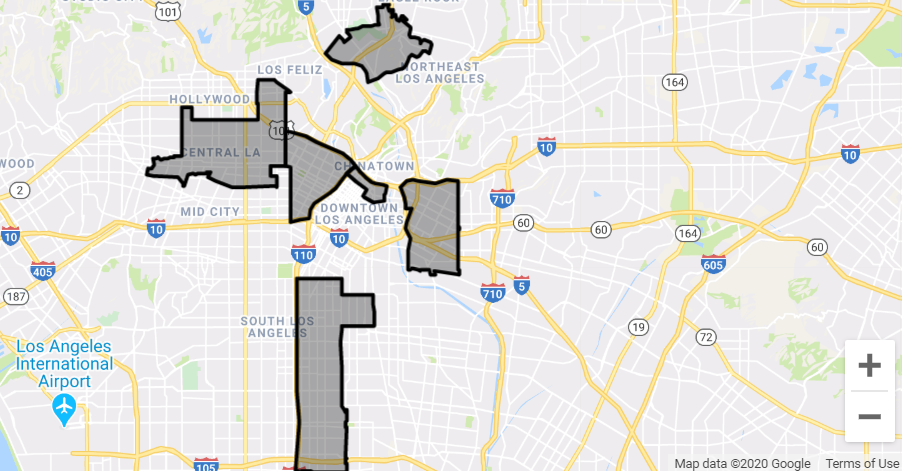

In [116]:
from IPython.display import Image
Image("Rental Spaces.PNG")

**Based on the details received on one of a real estate website following is the order of the rates in these localities --**

1. Boyle Heights - $4000 Sq.ft

2. Civic Center - Little Tokyo - $6000 per Sq.ft

3. Glassel Park - $5000 per Sq.ft

4. Mid Wilshire - $2000 per Sq.ft

5. Sotheast Los Angeles - $8000 per Sq.ft

6.  Westlake - $2000 per Sq.ft.

In case the client wants to go for a cheapest alternative of these, it can start Ice Cream Parlor at either Mid Wilshire or Westlake.

However, in case there are no limitations with respect to rental pricing, firm can decide the go with Civic Center - Little Tokyo owing to following advantages it seems to have over others --

1. In terms of location it is extremely close to the city center - 34.061 Lat -118.24 Long
2. Varied Cuisines served in the locality = Chinese, Mexican, Vietnamese, Continental, Seafood - This will attract diverse groups of people to this area which can promote branding of the firm in different communities.

Apart from the Restaurants, there is a huge list of other places that can attract large sections of crowd –
1.	El Pueblo Los Angeles Plaza Historical Park
2.	Proximity to Santa Anna Freeway increasing the accessibility for people from other localities
3.	Metro Station nearby
4.	Los Angeles Union Station
5.	Los Angeles State Historical Park
6.	Los Angeles Public Library
7.	Far East Plaza 
8.	Banks
9.	Enormous Parking Space nearby
10.	Alpine Recreation Center and Park

Thus, overall a hotspot attracting people from all over the town.
Hence, as a consultant, it is advisable to have the new ice cream parlour setup at one of the 8 locations, with Downtown Civic Center, Chinatown, being the 1st preference.




